In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm , skew
from scipy.special import boxcox
import os
from scipy import stats
import warnings  ### 煩 XD
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('../../data/train.csv',encoding='big5')
test = pd.read_csv('../../data/test.csv',encoding='big5')

In [4]:
train.head()

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,3418,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.000174,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,4302,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.008724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,5545,M,低,A1,A1,1.0,0.0,Y,1,Y,...,0.005359,A,Y,N,N,N,N,N,N,N
3,7207,M,低,A1,A1,NaN,0.0,Y,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,7213,M,低,A1,A1,1.0,0.0,N,0,N,...,0.000603,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


# 將所有的Y，N轉換成0,1 才能夠在corr上表示

In [30]:
train.replace('N',0,inplace=True)
train.replace('Y',1,inplace=True)
train.replace('M',0,inplace=True)
train.replace('F',1,inplace=True)

In [117]:
a = train['L1YR_GROSS_PRE_AMT']

In [124]:
train['L1YR_GROSS_PRE_AMT'].fillna(1)

0        0.000174
1        0.008724
2        0.005359
3        0.000000
4        0.000603
5        0.000243
6        0.002600
7        0.002887
8        0.000140
9        0.000182
10       0.000999
11       0.000000
12       0.000211
13       0.001449
14       0.000000
15       0.000435
16       0.000000
17       0.017312
18       0.000562
19       0.005559
20       0.000000
21       0.003570
22       0.006634
23       0.000173
24       0.017332
25       0.000000
26       0.002715
27       0.000869
28       0.000000
29       0.008155
           ...   
99970    0.000076
99971    0.000348
99972    0.000237
99973    0.001100
99974    0.000100
99975    0.000869
99976    0.000168
99977    0.003572
99978    0.003017
99979    0.000391
99980    0.000096
99981    0.000125
99982    0.010341
99983    0.000000
99984    0.000000
99985    0.000316
99986    0.000222
99987    0.000261
99988    0.000129
99989    0.000900
99990    0.000118
99991    0.000321
99992    0.000307
99993    0.000555
99994    0

In [115]:
train[boxcox(train['L1YR_GROSS_PRE_AMT'].dropna(),0.15) == -4.904987]

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
99970    False
99971    False
99972    False
99973    False
99974    False
99975    False
99976    False
99977    False
99978    False
99979    False
99980    False
99981    False
99982    False
99983    False
99984    False
99985    False
99986    False
99987    False
99988    False
99989    False
99990    False
99991    False
99992    False
99993    False
99994    False
99995    False
99996    False
99997    False
99998    False
99999    False
Name: L1YR_GROSS_PRE_AMT, Length: 100000, dtype: bool

In [125]:
def fill_float_na (df,target,lam) :
    
    a = boxcox(df[target].dropna(),lam)
    M = a.sum() / (len(a) - len(a[a == 0]))
    df[target] = df[target].fillna(M)
    
    return df

In [128]:
train['POLICY_VALUE_AMT'].isna().sum()

0

In [127]:
train = fill_float_na(train,'POLICY_VALUE_AMT',0.15)

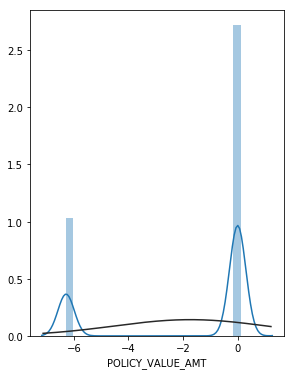

In [130]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(train['POLICY_VALUE_AMT'],fit= norm)
#plt.subplot(1,2,2)
#stats.probplot(boxcox(train['L1YR_GROSS_PRE_AMT'][(train['L1YR_GROSS_PRE_AMT']< 0.1)],0.15),plot=plt)
plt.show()

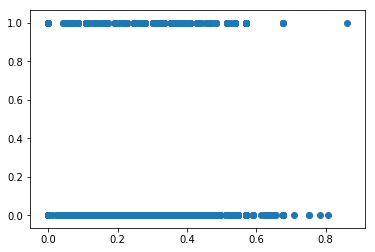

In [69]:
plt.scatter(train['DISEASES_HOSPITAL_REC_AMT'],train['Y1'])

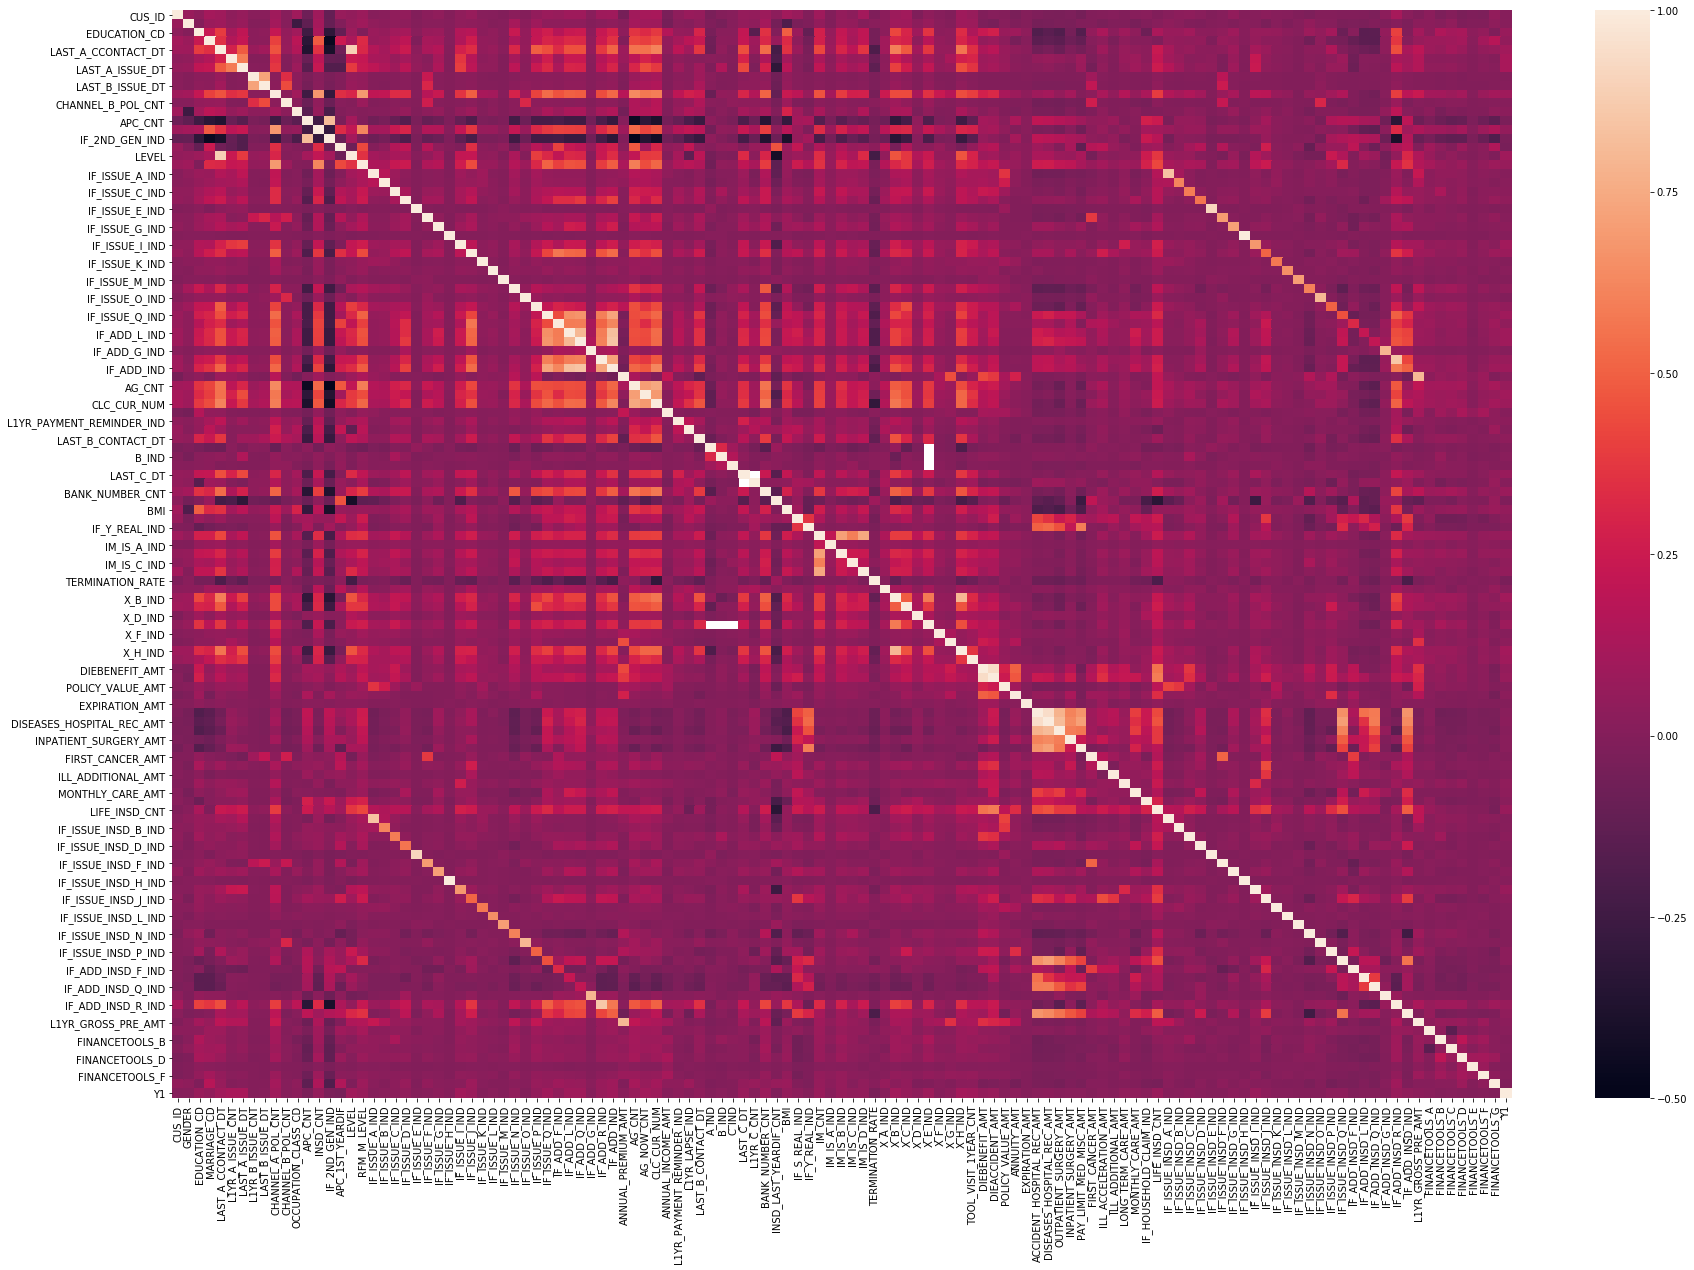

In [81]:
plt.figure(figsize=(30,20))
corr = train.corr()
sns.heatmap(corr)

In [83]:
corr['Y1'][corr['Y1'] > 0.1 ]

LAST_A_CCONTACT_DT    0.102597
L1YR_A_ISSUE_CNT      0.121897
LAST_A_ISSUE_DT       0.122550
IF_ISSUE_I_IND        0.103050
AG_NOW_CNT            0.101031
X_B_IND               0.100831
X_H_IND               0.106221
Y1                    1.000000
Name: Y1, dtype: float64

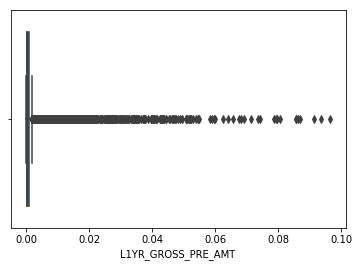

In [91]:
sns.boxplot(train['L1YR_GROSS_PRE_AMT'][(train['L1YR_GROSS_PRE_AMT']< 0.1) &(train['L1YR_GROSS_PRE_AMT']> 0)]) 

In [95]:
len(train['L1YR_GROSS_PRE_AMT'][(train['L1YR_GROSS_PRE_AMT']< 0.1) ])

99984

In [94]:
train.shape

(100000, 132)

In [99]:
boxcox(train['L1YR_GROSS_PRE_AMT'][(train['L1YR_GROSS_PRE_AMT']< 0.1) ],0.15)

0       -4.846790
1       -3.393111
2       -3.623873
3       -6.666667
4       -4.474180
5       -4.752933
6       -3.936666
7       -3.893537
8       -4.904987
9       -4.834273
10      -4.301575
11      -6.666667
12      -4.793471
13      -4.165907
14      -6.666667
15      -4.579148
16      -6.666667
17      -3.038727
18      -4.496850
19      -3.607072
20      -6.666667
21      -3.803737
22      -3.524914
23      -4.848199
24      -3.038104
25      -6.666667
26      -3.919004
27      -4.350420
28      -6.666667
29      -3.426081
           ...   
99970   -5.058346
99971   -4.647244
99972   -4.760679
99973   -4.267285
99974   -4.993334
99975   -4.350634
99976   -4.855854
99977   -3.803518
99978   -3.875176
99979   -4.612320
99980   -5.001260
99981   -4.934580
99982   -3.308560
99983   -6.666667
99984   -6.666667
99985   -4.677079
99986   -4.779588
99987   -4.732809
99988   -4.927767
99989   -4.338432
99990   -4.949278
99991   -4.672290
99992   -4.685074
99993   -4.501273
99994   -6

In [98]:
boxcox(train['L1YR_GROSS_PRE_AMT'][(train['L1YR_GROSS_PRE_AMT']< 0.1) &(train['L1YR_GROSS_PRE_AMT']> 0)],0.15)

0       -4.846790
1       -3.393111
2       -3.623873
4       -4.474180
5       -4.752933
6       -3.936666
7       -3.893537
8       -4.904987
9       -4.834273
10      -4.301575
12      -4.793471
13      -4.165907
15      -4.579148
17      -3.038727
18      -4.496850
19      -3.607072
21      -3.803737
22      -3.524914
23      -4.848199
24      -3.038104
26      -3.919004
27      -4.350420
29      -3.426081
32      -4.167652
34      -2.993030
35      -3.399212
38      -3.824187
39      -2.772281
41      -4.848293
42      -5.063122
           ...   
99964   -5.188131
99965   -4.116267
99966   -4.902752
99968   -4.460241
99969   -4.454970
99970   -5.058346
99971   -4.647244
99972   -4.760679
99973   -4.267285
99974   -4.993334
99975   -4.350634
99976   -4.855854
99977   -3.803518
99978   -3.875176
99979   -4.612320
99980   -5.001260
99981   -4.934580
99982   -3.308560
99985   -4.677079
99986   -4.779588
99987   -4.732809
99988   -4.927767
99989   -4.338432
99990   -4.949278
99991   -4

# 將有多峰值得分配 0取出來特別label   先區分出有無繳交保費的新特徵

## ex : L1YR_GROSS_PRE_AMT  先新增一個特徵叫做是否有繳交年化保費

In [ ]:
['ACCIDENT_HOSPITAL_REC_AMT', 'ANNUAL_INCOME_AMT', 'ANNUAL_PREMIUM_AMT', 'ANNUITY_AMT', 'APC_1ST_YEARDIF', 'BANK_NUMBER_CNT', 
'BMI', 'DIEACCIDENT_AMT', 'DIEBENEFIT_AMT', 'DISEASES_HOSPITAL_REC_AMT', 'EDUCATION_CD', 'EXPIRATION_AMT', 'FIRST_CANCER_AMT', 
'ILL_ACCELERATION_AMT']


In [ ]:
tranform_list = ['ILL_ADDITIONAL_AMT','INPATIENT_SURGERY_AMT','INSD_LAST_YEARDIF_CNT','L1YR_C_CNT','L1YR_GROSS_PRE_AMT',
                'LIFE_INSD_CNT','LONG_TERM_CARE_AMT','MONTHLY_CARE_AMT','OCCUPATION_CLASS_CD','OUTPATIENT_SURGERY_AMT',
                'POLICY_VALUE_AMT','TERMINATION_RATE','LEVEL','MARRIAGE_CD','PAY_LIMIT_MED_MISC_AMT','RFM_M_LEVEL']